# Section 7: Matrix Determinants

## Determinants of Simple Matrices

In [1]:
import numpy as np

In [2]:
# generate a 2x2 matrix of integers with linear dependencies
# comoute the rank
A = [[1,3], [1,3]]
print(np.linalg.det(A))

0.0


In [3]:
# generate random matrix without and with linear dependencies
m = 5
A = np.random.randn(m,m)
print(np.linalg.det(A))

5.477239865719277


In [4]:
# create linear dependencies
A[:,0] = A[:,1]
print(A)
print(np.linalg.det(A))

[[ 0.4876084   0.4876084   1.33981223  0.1004025  -0.83884348]
 [ 0.68193198  0.68193198  0.62621927 -0.45171108 -1.88967604]
 [ 1.04143771  1.04143771  0.9531588  -0.32669846  0.52612886]
 [-1.0657756  -1.0657756   0.73711078 -0.24192671 -0.30817084]
 [-0.43637209 -0.43637209  1.09149227 -1.47489237  0.85561455]]
-5.459351483975485e-17


In [5]:
m = 10
A = np.random.randn(m,m)
print(np.linalg.det(A))
A[:,0] = A[:,1]
print(np.linalg.det(A))

540.0513334898761
-3.8293057262642396e-14


In [6]:
m = 30
A = np.random.randn(m,m)
print(np.linalg.det(A))

1.7866549445521456e+16


In [7]:
A[:,0] = A[:,1]
print(np.linalg.det(A))

-0.014403009467721405


In [8]:
m = 300
A = np.random.randn(m,m)
print(np.linalg.det(A))
A[:,0] = A[:,200]
print(np.linalg.det(A))

-4.043001242854066e+305
-7.962442982606249e+288


## Large Matrices with Row Exchange

In [9]:
# Generate a 6x6 matrix
# - Compute the determinant
# - Swap one row and compute determinant
# - Swap two rows and compute determinant
A = np.random.randn(6,6)
print("Determinant before row swap: {}".format(np.linalg.det(A)))

Determinant before row swap: 1.131053507777759


In [10]:
As = A[[1,0,2,3,4,5], :]
print("Determinant after row swap: {}".format(np.linalg.det(As)))

Determinant after row swap: -1.131053507777759


In [11]:
Ass = A[[1,0,2,4,3,5],:]
print("Determinant 2 row swap: {}".format(np.linalg.det(Ass)))

Determinant 2 row swap: 1.131053507777759


In [12]:
As = A[:, [1,0,2,3,4,5]]
print("Determinant after column swap: {}".format(np.linalg.det(As)))

Determinant after column swap: -1.131053507777759


In [13]:
Ass = A[:, [1,0,2,4,3,5]]
print("Determinant after 2 column swap: {}".format(np.linalg.det(Ass)))

Determinant after 2 column swap: 1.1310535077777588


## Code Challenge: Determinant of Shifted Matrix

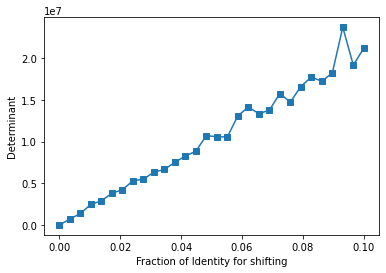

In [14]:
# Generate a random square matrix (n=20)
# impose linear dependence
# Shift the matrix (0 -> .1 times the identity matrix) (lambda)
# compute the abs(determinant) of the shifted matrix
# repeat it 1000 times, take the average abs
# plot the determinant as a function of lambda
import matplotlib.pyplot as plt

lambdas = np.linspace(0, 0.1, 30)

# initialize
tmp = np.zeros(1000)
dets = np.zeros(len(lambdas))

for deti in range(len(lambdas)):
    
    # run 1000 iterations
    for i in range(1000):
        
        # generate a matrix
        M = np.random.randn(20,20)
        M[:,0] = M[:,1]
        
        # compute the determinant
        tmp[i] = abs( np.linalg.det(M + lambdas[deti]*np.eye(20)))
    # compute the average determinant
    dets[deti] = np.mean(tmp)
    
plt.plot(lambdas, dets, "s-")
plt.xlabel("Fraction of Identity for shifting")
plt.ylabel("Determinant")
plt.show()

In [15]:
dets

array([3.13391312e-08, 7.10568673e+05, 1.37025895e+06, 2.46871099e+06,
       2.88482180e+06, 3.80683772e+06, 4.19931546e+06, 5.30225364e+06,
       5.46743279e+06, 6.33876076e+06, 6.65152037e+06, 7.50889113e+06,
       8.26276543e+06, 8.84428159e+06, 1.07162446e+07, 1.05783749e+07,
       1.05481078e+07, 1.30923306e+07, 1.41301735e+07, 1.33589541e+07,
       1.37538986e+07, 1.57618127e+07, 1.47375296e+07, 1.66053782e+07,
       1.77455053e+07, 1.72364044e+07, 1.82273669e+07, 2.37168222e+07,
       1.91731367e+07, 2.12020068e+07])

## Code Challenge II

In [16]:
# Illustrate that det(AB) = det(A)*det(B)
# 1) for a 3x3 matrix
A = np.random.randn(3,3)
B = np.random.randn(3,3)

AB = A@B

print(np.linalg.det(AB))
print(np.linalg.det(A)*np.linalg.det(B))

-10.135195689907707
-10.135195689907706


In [17]:
# Use a loop to go up to matrices of size 40x40
dets = np.zeros(40)

m = 40
for k in range(2,m):
    A = np.random.randn(k,k)
    B = np.random.randn(k,k)
    
    dets[k-2] = np.linalg.det(A@B) - (np.linalg.det(A)*np.linalg.det(B))


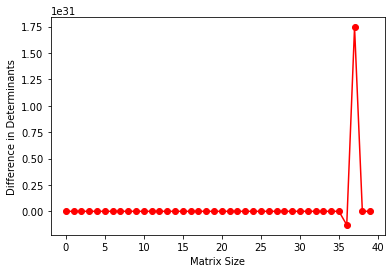

In [18]:
plt.plot(dets, "or-")
plt.xlabel("Matrix Size")
plt.ylabel("Difference in Determinants")
plt.show()

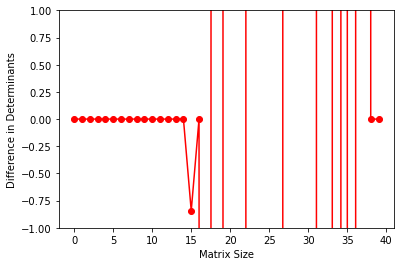

In [19]:
plt.plot(dets, "or-")
plt.ylim([-1,1])
plt.xlabel("Matrix Size")
plt.ylabel("Difference in Determinants")
plt.show()